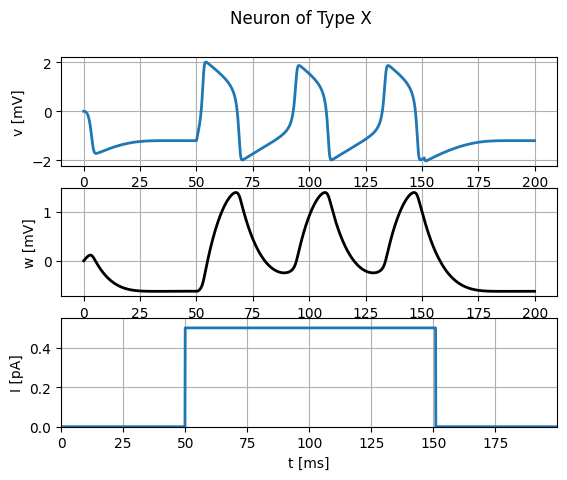

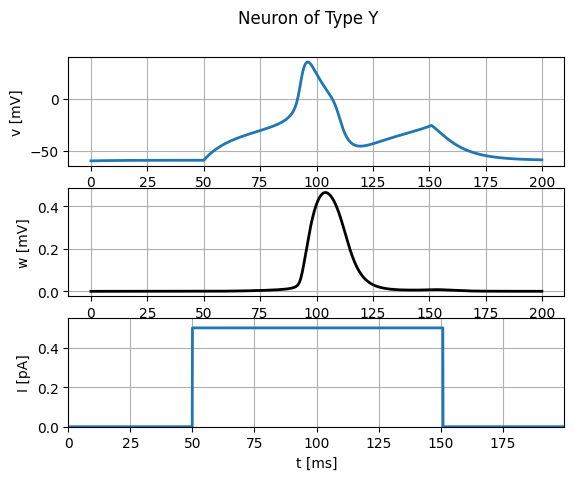

In [2]:
%matplotlib inline  
# needed in Notebooks, not in Python scripts
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

# 8.1.1

각각에 대해서 X는 type 1으로 볼 수 있고, Y는 type 2로 볼 수 있다. <br>
(Type 2의 그래프가 촘촘하게 발생하고, Type 1의 그래프가 시간이 delay되었음을 볼 수 있다.)

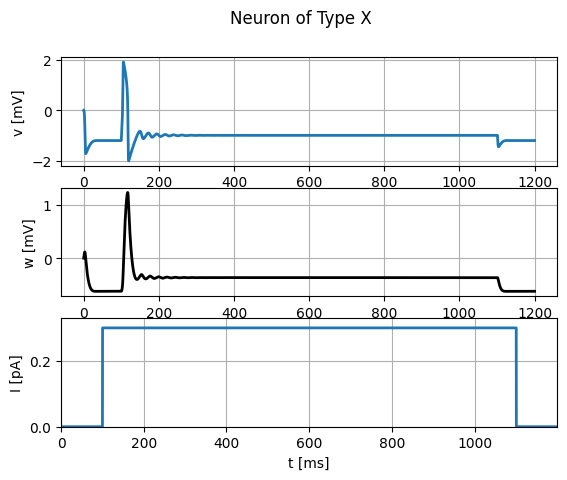

In [14]:
%matplotlib inline 
I_amp = 0.3

# create an input current
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 1200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

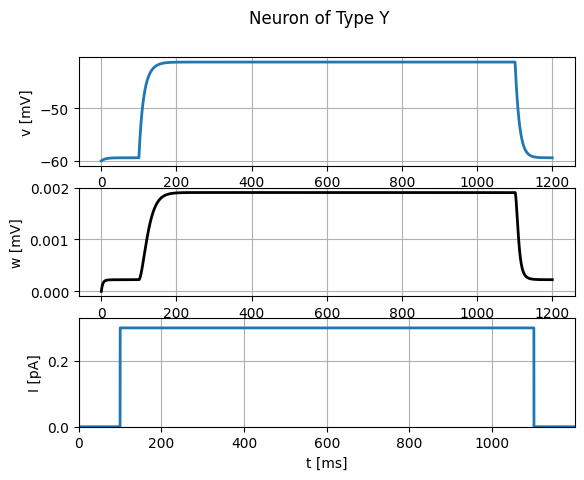

In [15]:
# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 1200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

# 8.2

1초동안 spike되는 수는?<br>
ISI (inter spike interval?)의 평균을 구하고, 역수를 취해주면 firing rate가 된다.

In [18]:
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)

a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_X.run(input_current, 1200*b2.ms)
spike_times = spike_tools.get_spike_time(state_monitor, 1*b2.mV)
print(spike_times)
# print(type(spike_times))  # it's a Quantity
print(len(spike_times))
isi = spike_times[1:]-spike_times[:-1]

spike_tools.pretty_print_spike_train_stats(spike_times)

[104.3] ms
1


TypeError: pretty_print_spike_train_stats() missing 1 required positional argument: 'spike_threshold'

self-made function rate :  4.1759465478841875
nr of spikes: 4
mean ISI: 0.23946666666666663
ISI variance: 2.2222222222242e-09
spike freq: 4.1759465478841875
spike times: [0.3124 0.5519 0.7913 1.0308] s
ISI: [239.5 239.4 239.5] ms
(array([0.3124, 0.5519, 0.7913, 1.0308]) * second, array([239.5, 239.4, 239.5]) * msecond, 239.46666667 * msecond, 4.17594655 * hertz, 2222.22222222 * usecond2)


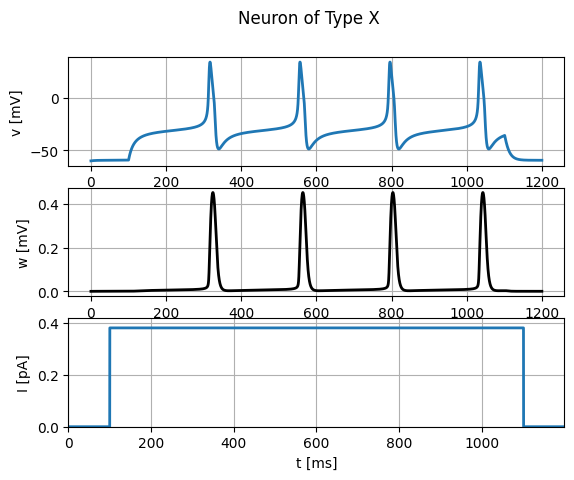

In [7]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

def get_firing_rate(neuron, input_current):
    state_monitor = neuron.run(input_current, 1200*b2.ms)
    spike_times = spike_tools.get_spike_time(state_monitor, 1.*b2.mV)
    isi = []
    for i in range(len(spike_times)-1):
        isi.append(spike_times[i+1]-spike_times[i])
    isi_avg = np.average(isi)

    return 1/isi_avg

# create an input current
I_amp=0.38
input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)

a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
rate = get_firing_rate(a_neuron_of_type_X, input_current)
print("self-made function rate : ", rate)


# provide nr_of_spike, spike_times, isi, mean_isi, spike_rate)
st=spike_tools.pretty_print_spike_train_stats(state_monitor, 1.*b2.mV)
print(st)
neurons.plot_data(state_monitor, title="Neuron of Type X")


nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.664] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6626] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6613] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6599] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6586] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6573] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.656] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6547] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6534] s
ISI: [] s
nr of spikes: 1
mean ISI: nan
ISI variance: nan
spike freq: nan
spike times: [0.6521] s
ISI: [] s
nr of spikes: 1
mean I

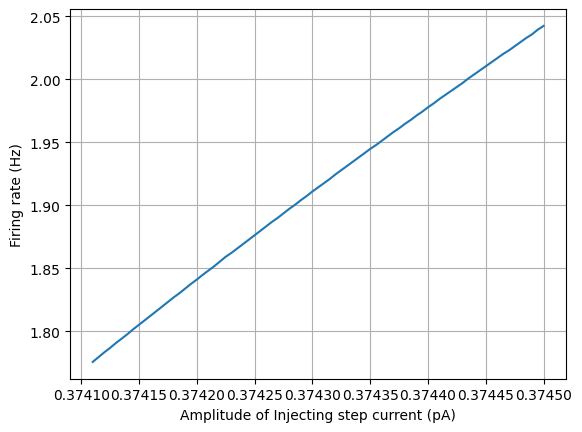

In [2]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

I=np.arange(0.374,0.3745,0.000005)
f=[]
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II

for I_amp in I :
    input_current = input_factory.get_step_current(100, 100100, 1.*b2.ms, I_amp*b2.pA)

    state_monitor = a_neuron_of_type_X.run(input_current, 1200*b2.ms)
    # provide nr_of_spike, spike_times, isi, mean_isi, spike_rate)
    st=spike_tools.pretty_print_spike_train_stats(state_monitor, 1.*b2.mV)
    #print(st)
    # print("0=",st[0])
    # #print("1=",st[1])
    # #print("2=",st[2])
    # print("3=",st[3])
    f.append(st[3])

plt.plot(I, f)
plt.xlabel('Amplitude of Injecting step current (pA)')
plt.ylabel('Firing rate (Hz)')
plt.grid()
plt.show()
